In [281]:
!pip install seaborn
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [282]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [283]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [284]:
data= pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


EXPLORATORY DATA ANALYSIS(EDA)

In [285]:
data.shape

(5000, 7)

In [286]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [288]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [289]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [290]:
data.describe(include='object')

,Address
count,5000
unique,5000
top,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,1


MISSING DATA

In [291]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

UNIQUE CLASSES

In [292]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [293]:
data.nunique(axis=0)

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [294]:
data.Address.unique()

array(['208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101',
       '188 Johnson Views Suite 079\nLake Kathleen, CA 48958',
       '9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489', ...,
       '4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165',
       'USS Wallace\nFPO AE 73316',
       '37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595'],
      dtype=object)

In [295]:
numerical_col = data.select_dtypes(include=np.number).columns
numerical_col

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [296]:
numerical_col = data.select_dtypes(include=np.number).columns
numerical_col
for i in numerical_col:
    print(data[i].value_counts())
    print()
    print('------------------------------------------------------------')
    print()

Avg. Area Income
79545.458574    1
68735.436608    1
71635.473101    1
73211.136245    1
86249.993070    1
               ..
66064.532823    1
59390.346824    1
64661.930276    1
73279.030904    1
65510.581804    1
Name: count, Length: 5000, dtype: int64

------------------------------------------------------------

Avg. Area House Age
5.682861    1
7.721909    1
5.866996    1
6.501139    1
6.155403    1
           ..
6.659562    1
5.664971    1
4.656696    1
5.902296    1
5.992305    1
Name: count, Length: 5000, dtype: int64

------------------------------------------------------------

Avg. Area Number of Rooms
7.009188     1
7.621975     1
6.075987     1
10.280022    1
7.967184     1
            ..
6.881398     1
6.750872     1
5.660253     1
8.077578     1
6.792336     1
Name: count, Length: 5000, dtype: int64

------------------------------------------------------------

Avg. Area Number of Bedrooms
4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.31     7
6.01 

In [297]:
def attribute_info(df_col):
    
    print(f'Descrition of Attribute: \n \n {df_col.describe()} \n')
    print(f'Value Count: \n \n {df_col.value_counts()} \n')    
    print(f'Unique Values: \n \n {df_col.unique()} \n')        
    print(f'Missing Values: \n \n {df_col.isnull().sum()} \n')    
    print(f'Missing Values in %: \n \n {df_col.isnull().mean()} \n')            

In [298]:
attribute_info(data['Avg. Area Number of Rooms'])

Descrition of Attribute: 
 
 count    5000.000000
mean        6.987792
std         1.005833
min         3.236194
25%         6.299250
50%         7.002902
75%         7.665871
max        10.759588
Name: Avg. Area Number of Rooms, dtype: float64 

Value Count: 
 
 Avg. Area Number of Rooms
7.009188     1
7.621975     1
6.075987     1
10.280022    1
7.967184     1
            ..
6.881398     1
6.750872     1
5.660253     1
8.077578     1
6.792336     1
Name: count, Length: 5000, dtype: int64 

Unique Values: 
 
 [7.00918814 6.73082102 8.51272743 ... 4.80508098 7.13014386 6.7923361 ] 

Missing Values: 
 
 0 

Missing Values in %: 
 
 0.0 



In [299]:
for col in data:
    print(f"\033[1m --------------------------------- {col} ----------------------------------- \033[0m")
    print('\n \n')
    attribute_info(data[col])
    print()

 --------------------------------- Avg. Area Income ----------------------------------- 

 

Descrition of Attribute: 
 
 count      5000.000000
mean      68583.108984
std       10657.991214
min       17796.631190
25%       61480.562388
50%       68804.286404
75%       75783.338666
max      107701.748378
Name: Avg. Area Income, dtype: float64 

Value Count: 
 
 Avg. Area Income
79545.458574    1
68735.436608    1
71635.473101    1
73211.136245    1
86249.993070    1
               ..
66064.532823    1
59390.346824    1
64661.930276    1
73279.030904    1
65510.581804    1
Name: count, Length: 5000, dtype: int64 

Unique Values: 
 
 [79545.45857432 79248.64245483 61287.06717866 ... 63390.6868855
 68001.33123509 65510.58180367] 

Missing Values: 
 
 0 

Missing Values in %: 
 
 0.0 


 --------------------------------- Avg. Area House Age ----------------------------------- 

 

Descrition of Attribute: 
 
 count    5000.000000
mean        5.977222
std         0.991456
min         2.6443

DATA VISUALISATION

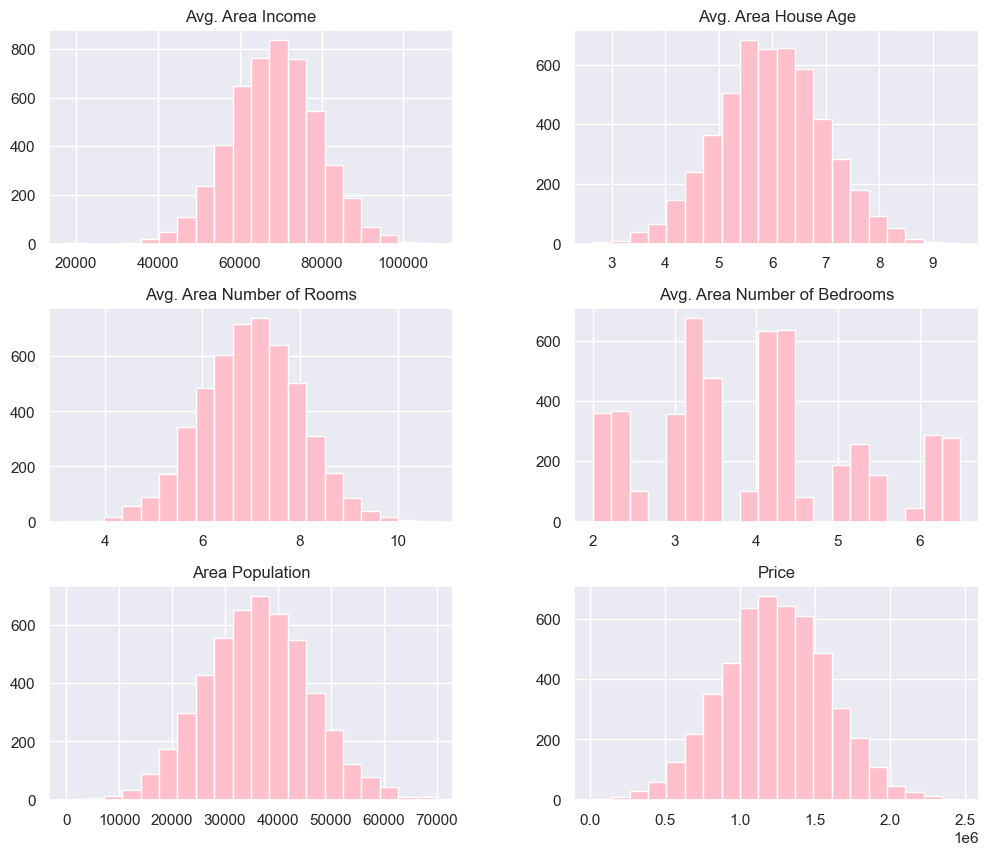

In [300]:
data.hist(figsize=(12,10),color='pink',bins=20)
plt.show()

OUTLIER DETECTION

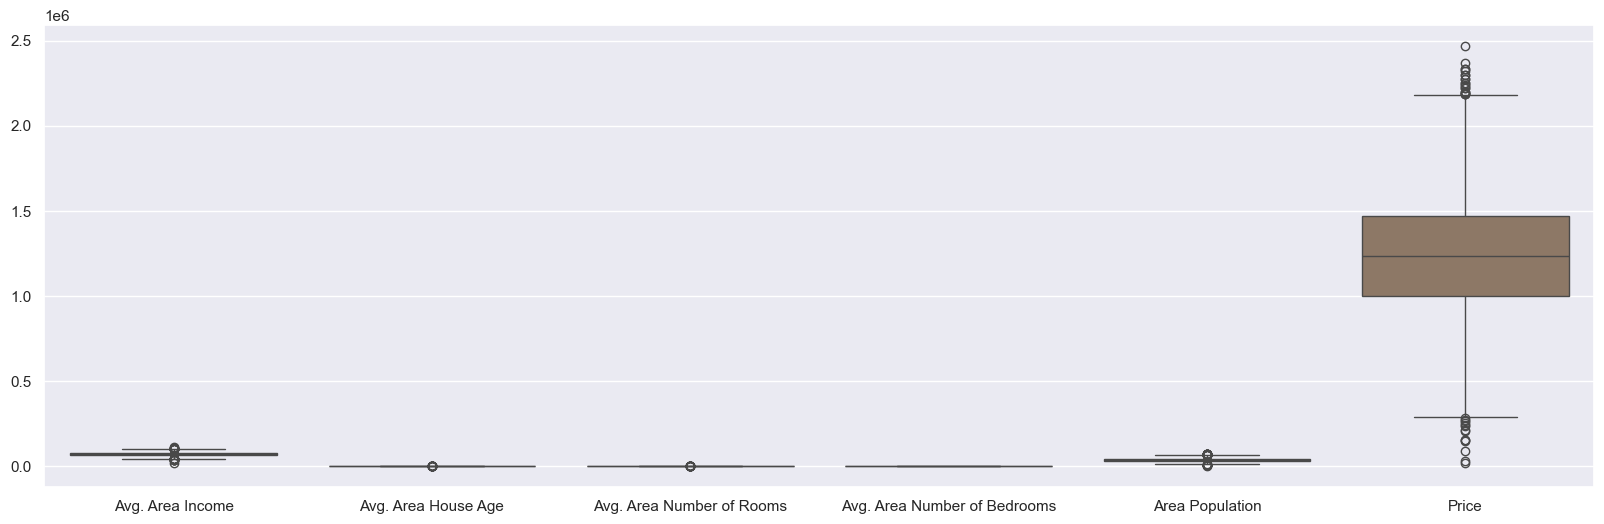

In [301]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(data)

plt.show()

OUTLIERS OF Avg. Area Income

<Axes: ylabel='Avg. Area Income'>

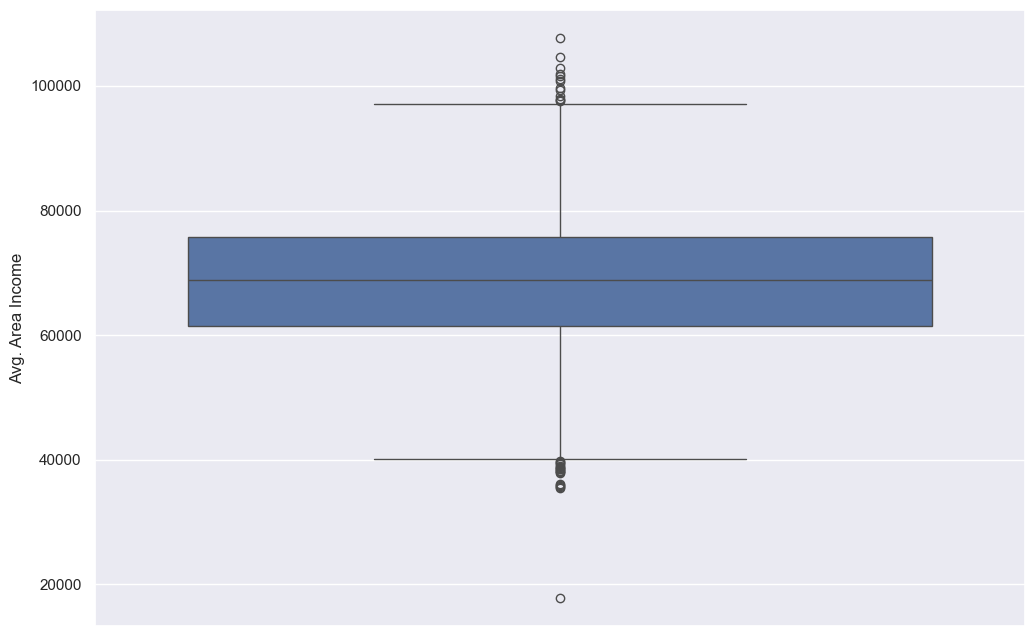

In [302]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area Income'])


In [303]:
(data[data['Avg. Area Income']>95000]).index

Index([  94,  428,  558,  601,  693,  876,  962, 1096, 1264, 1516, 1734, 1891,
       1957, 2300, 2383, 2588, 2719, 3059, 3483, 3541, 3611, 3670, 3798, 3905,
       3945, 3947, 4087, 4158, 4206, 4400, 4524],
      dtype='int64')

In [304]:
data.drop(index=[  94,  428,  558,  601,  693,  876,  962, 1096, 1264, 1516, 1734, 1891,
       1957, 2300, 2383, 2588, 2719, 3059, 3483, 3541, 3611, 3670, 3798, 3905,
       3945, 3947, 4087, 4158, 4206, 4400, 4524],axis=0,inplace=True)

In [305]:
data.shape

(4969, 7)

In [306]:
data[data['Avg. Area Income']<40000].index

Index([  12,   39,  411,  844, 1271, 1459, 1597, 2025, 2092, 2242, 2597, 3069,
       3144, 3183, 4449, 4716, 4744, 4844, 4855],
      dtype='int64')

In [307]:
data.drop(index=[  12,   39,  411,  844, 1271, 1459, 1597, 2025, 2092, 2242, 2597, 3069,
       3144, 3183, 4449, 4716, 4744, 4844, 4855],axis=0,inplace=True)


In [308]:
data.shape

(4950, 7)

<Axes: ylabel='Avg. Area Income'>

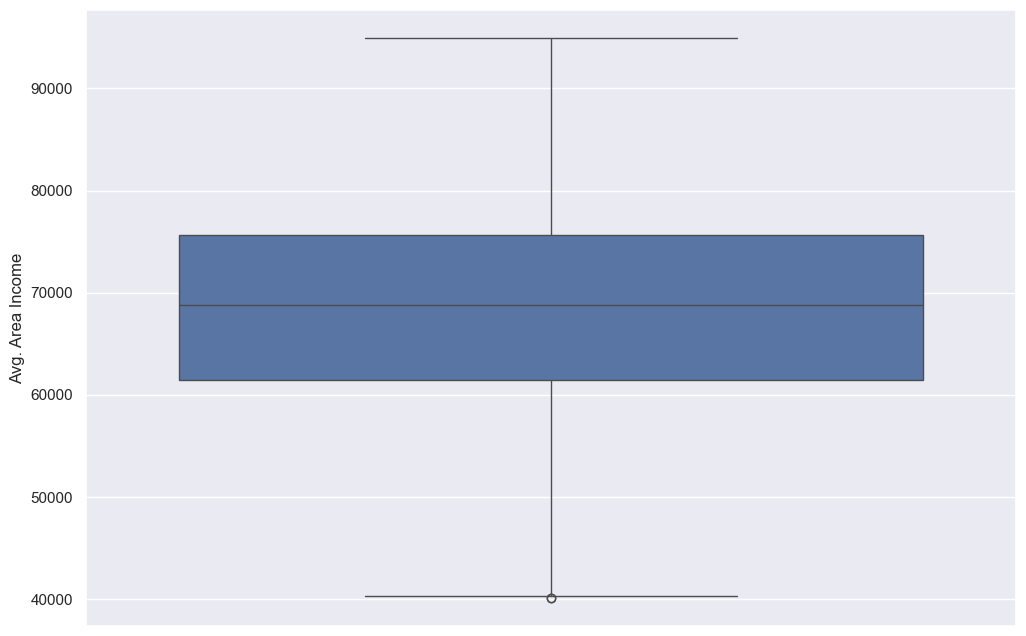

In [309]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area Income'])

In [310]:
data[data['Avg. Area Income']<41000].index

Index([214, 263, 1357, 1606, 1987, 2915, 3077, 3141], dtype='int64')

In [311]:
data.drop(index=[214, 263, 1357, 1606, 1987, 2915, 3077, 3141],axis=0,inplace=True)

In [312]:
data.shape

(4942, 7)

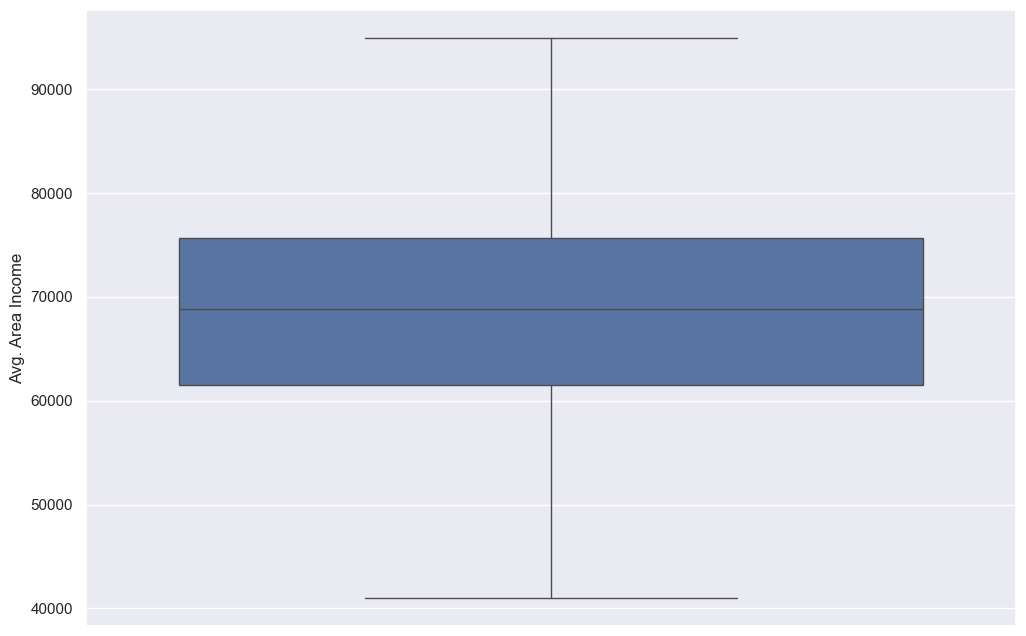

In [313]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area Income'])
plt.show()

OUTLIERS OF Avg. Area House Age

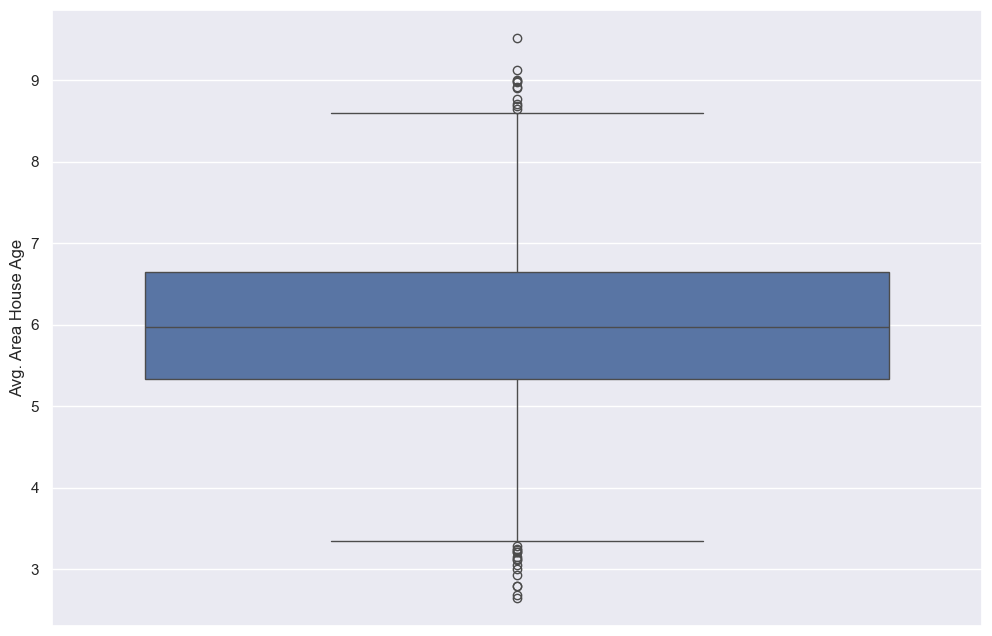

In [314]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area House Age'])
plt.show()


In [315]:
data[data['Avg. Area House Age']<3.4].index

Index([ 847, 1074, 1166, 1220, 1285, 1494, 1628, 1726, 1859, 2366, 2432, 2465,
       2974, 3831, 3904, 4324, 4429, 4488, 4565],
      dtype='int64')

In [316]:
data[data['Avg. Area House Age']>8.6].index

Index([918, 1091, 1777, 1855, 2898, 3138, 3388, 3698, 3989, 4859, 4978], dtype='int64')

In [317]:
data.drop(index=[847, 1074, 1166, 1220, 1285, 1494, 1628, 1726, 1859, 2366, 2432, 2465,
       2974, 3831, 3904, 4324, 4429, 4488, 4565,918, 1091, 1777, 1855, 2898, 3138, 3388, 3698, 3989, 4859, 4978],axis=0,inplace=True)

In [318]:
data.shape

(4912, 7)

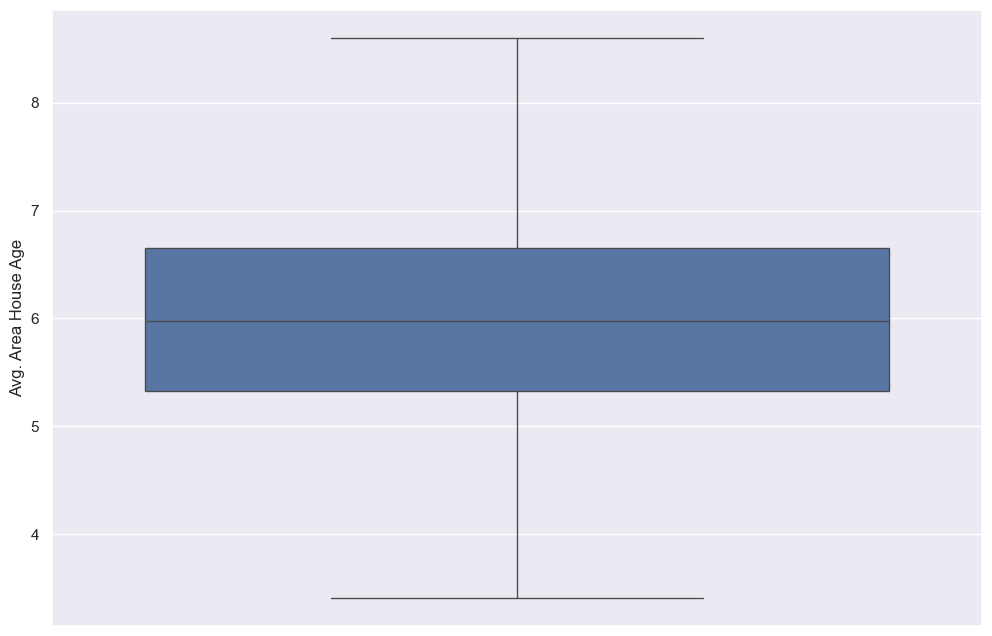

In [319]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area House Age'])
plt.show()

OUTLIERS OF Avg. Area Number of Rooms


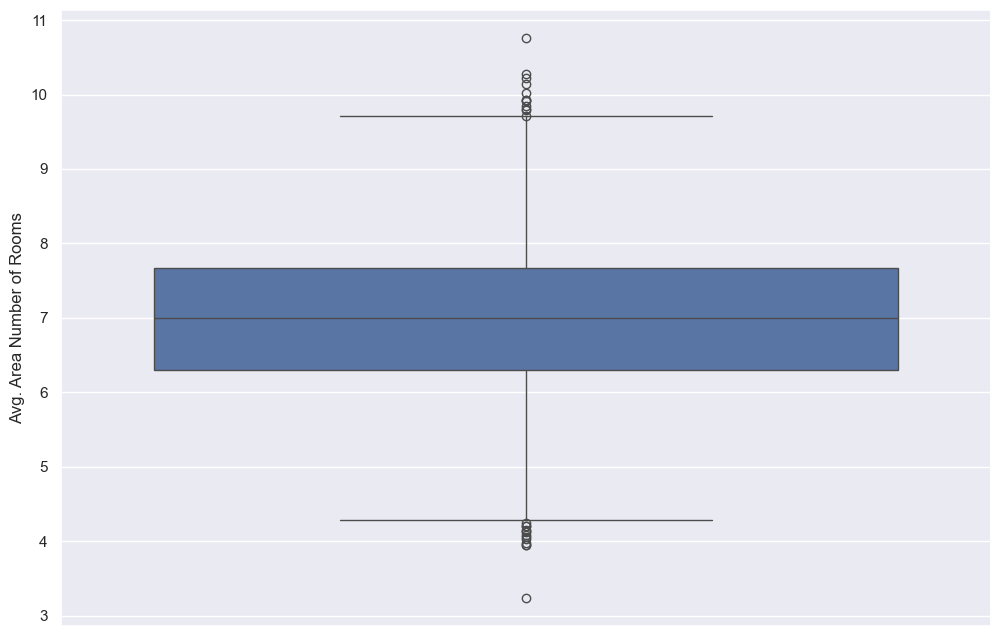

In [320]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area Number of Rooms'])
plt.show()

In [321]:
data[data['Avg. Area Number of Rooms']>9.7].index

Index([ 238,  465, 1531, 1536, 1845, 2066, 2503, 2676, 3039, 3336, 3466, 3806,
       3855, 4777],
      dtype='int64')

In [322]:
data[data['Avg. Area Number of Rooms']<4.3].index

Index([  28,  496, 1110, 1423, 1757, 1799, 2120, 2771, 2963, 3600, 3803, 3902,
       3922, 4318, 4412, 4631],
      dtype='int64')

In [323]:
data.drop(index=[238,  465, 1531, 1536, 1845, 2066, 2503, 2676, 3039, 3336, 3466, 3806,
       3855, 4777,28,  496, 1110, 1423, 1757, 1799, 2120, 2771, 2963, 3600, 3803, 3902,
       3922, 4318, 4412, 4631],axis=0,inplace=True)

In [324]:
data.shape

(4882, 7)

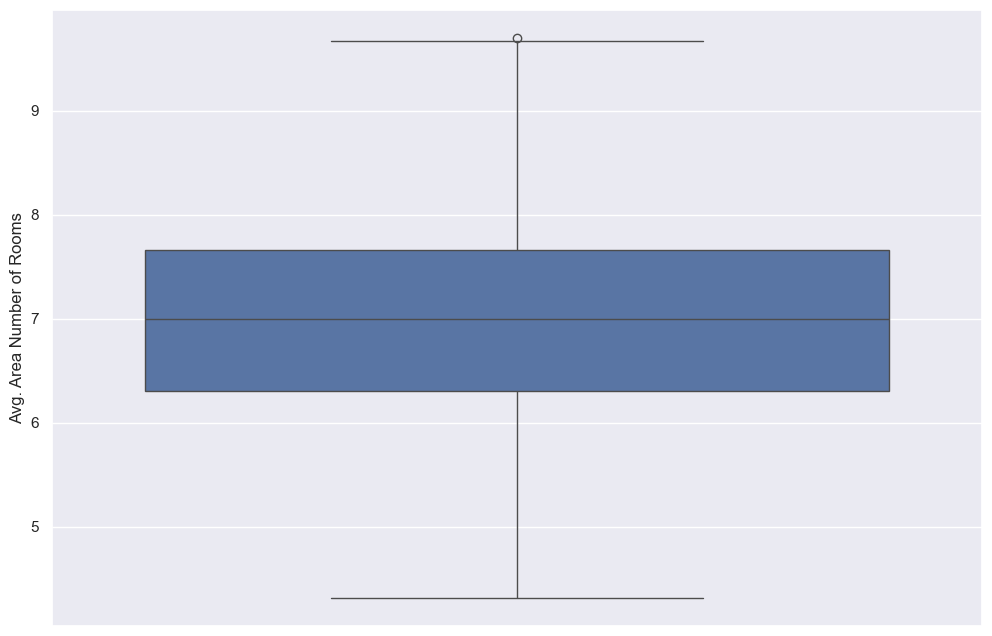

In [325]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area Number of Rooms'])
plt.show()

In [326]:
data[data['Avg. Area Number of Rooms']>9.65].index

Index([981, 3475, 4448, 4748], dtype='int64')

In [327]:
data.drop(index=[981, 3475, 4448, 4748],axis=0,inplace=True)

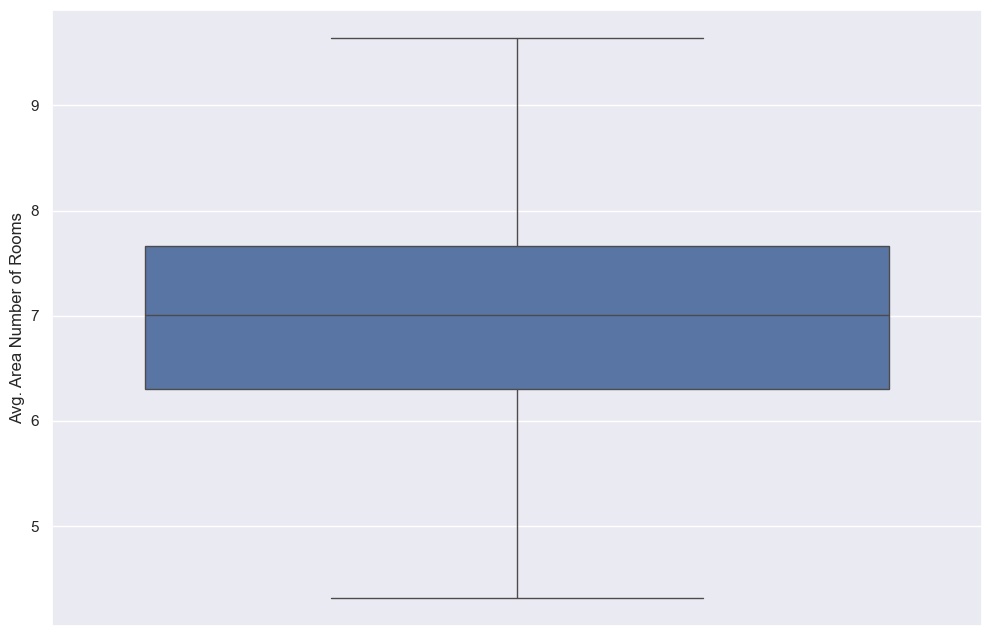

In [328]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area Number of Rooms'])
plt.show()

OUTLIERS OF Avg. Area Number of Bedrooms

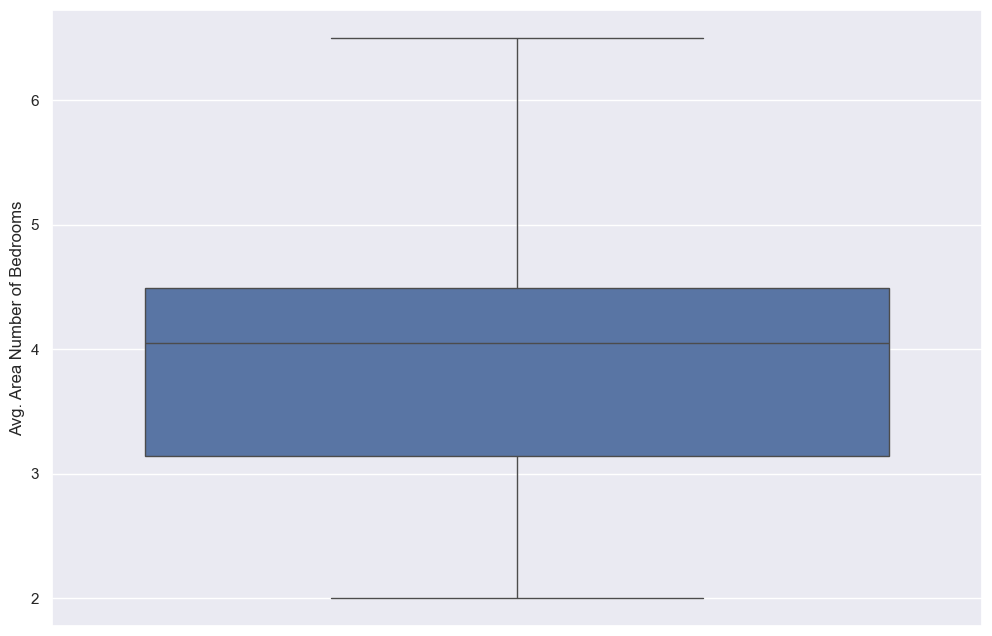

In [329]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Avg. Area Number of Bedrooms'])
plt.show()

In [330]:
#no outliers

OUTLIERS OF Area Population

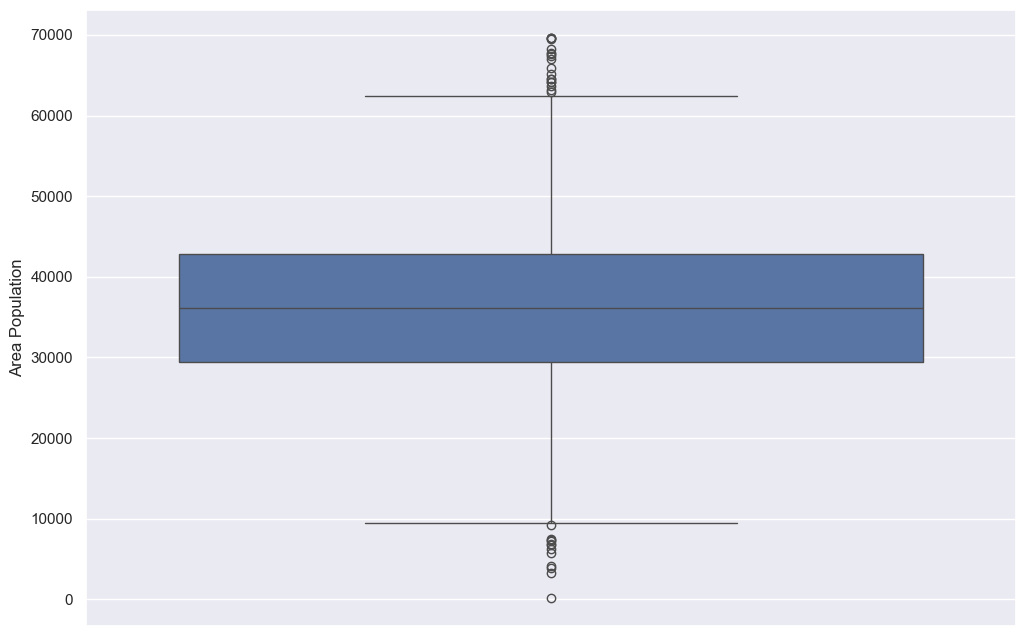

In [331]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Area Population'])
plt.show()

In [332]:
data[data['Area Population']>62000].index

Index([ 228,  353,  643, 1234, 1361, 1595, 1965, 2108, 2173, 2380, 2422, 2603,
       2839, 3134, 3387, 3442, 3578, 3991, 4393, 4487, 4786, 4803],
      dtype='int64')

In [333]:
data[data['Area Population']<10000].index

Index([ 105,  314,  349, 1530, 2299, 2392, 2534, 2756, 2829, 3120, 3540, 4182,
       4290, 4491, 4684],
      dtype='int64')

In [334]:
data.drop(index=[228,  353,  643, 1234, 1361, 1595, 1965, 2108, 2173, 2380, 2422, 2603,
       2839, 3134, 3387, 3442, 3578, 3991, 4393, 4487, 4786, 4803,105,  314,  349, 1530, 2299, 2392,
                 2534, 2756, 2829, 3120, 3540, 4182,4290, 4491, 4684],axis=0,inplace=True)

In [335]:
data.shape

(4841, 7)

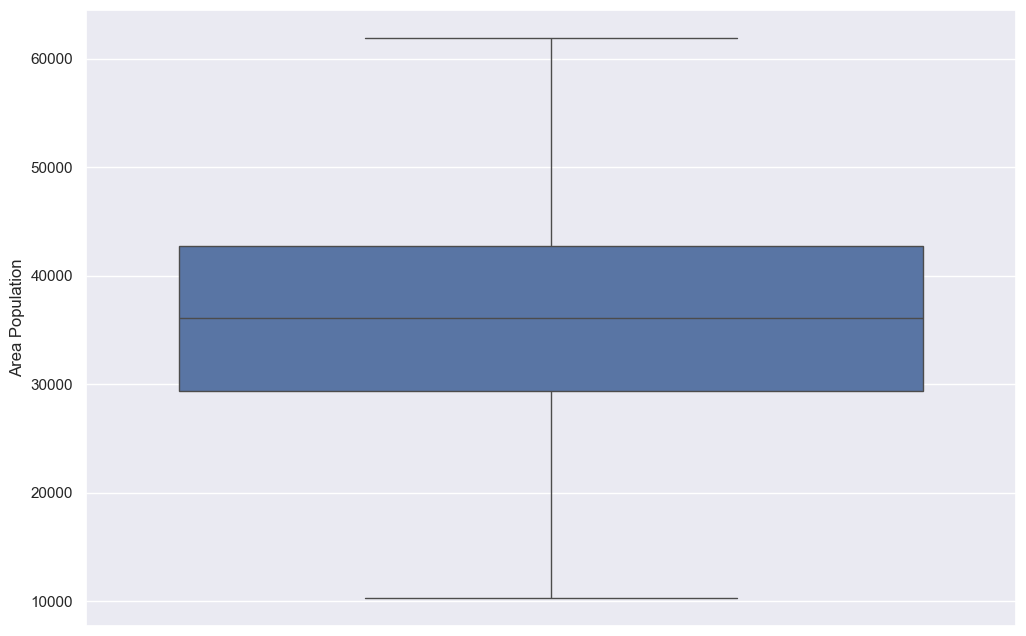

In [336]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Area Population'])
plt.show()

DUPLICATED DATA

In [337]:
data.duplicated().sum()

0

In [338]:
#no duplicate data

In [339]:
p=data.drop(columns='Address',axis=1)

In [340]:
#to drop the address beacuse it has all unique values 
#also it will not affect the price prediction

CORELATIONAL MATRIX

In [341]:
p.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.006369,-0.017580,0.016345,-0.003006,0.634511
Avg. Area House Age,-0.006369,1.000000,-0.009072,0.007165,-0.016361,0.454495
Avg. Area Number of Rooms,-0.017580,-0.009072,1.000000,0.468934,0.003008,0.333553
Avg. Area Number of Bedrooms,0.016345,0.007165,0.468934,1.000000,-0.020702,0.173563
Area Population,-0.003006,-0.016361,0.003008,-0.020702,1.000000,0.413859
Price,0.634511,0.454495,0.333553,0.173563,0.413859,1.000000


<Axes: >

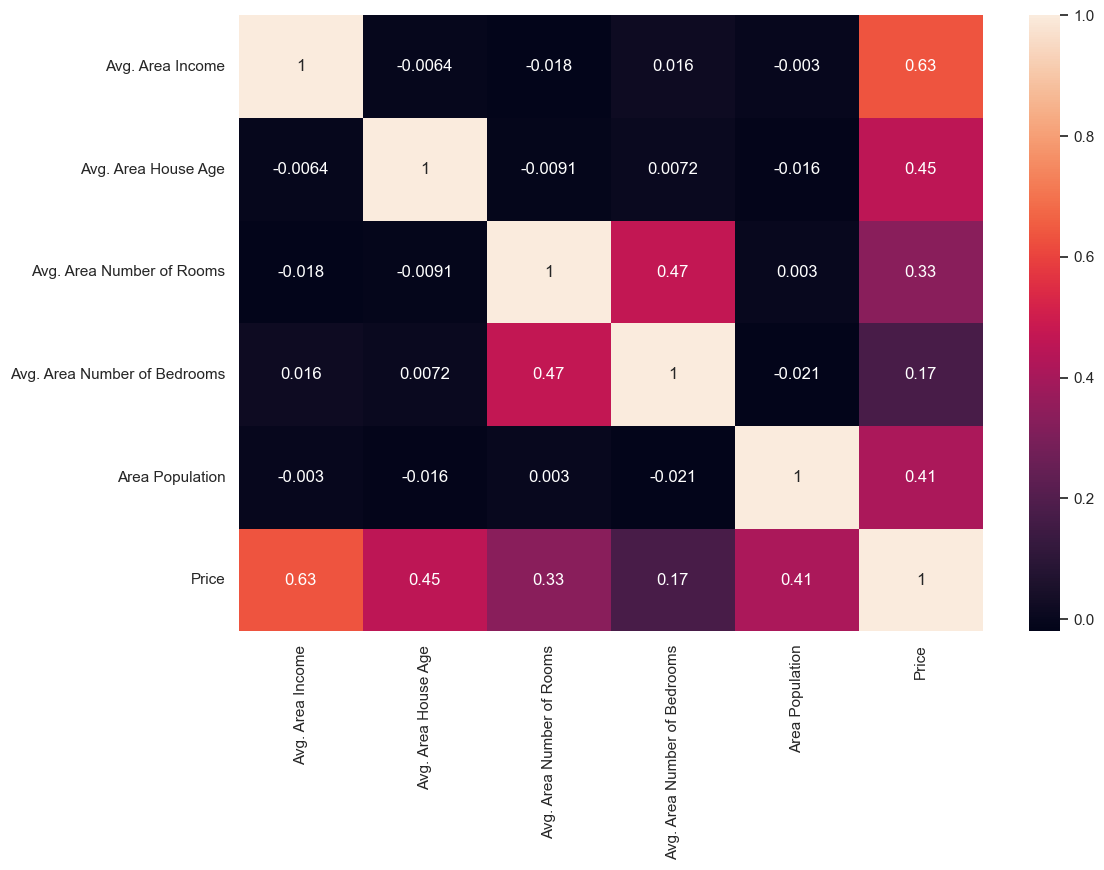

In [342]:
sns.heatmap(p.corr(),annot=True)

In [343]:
#acc to this every feature is relevant to price prediction

MODEL BUILDING

In [344]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [345]:
p.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


SEPARATION OF INDEPENDENT AND DEPENDENT VARIABLE

In [346]:
X=p.iloc[:,:5]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [347]:
y= p[['Price']]
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


In [348]:
p.shape

(4841, 6)

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [350]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1345,70315.429265,5.878218,6.486462,4.33,49697.932786
1323,80233.228301,5.334072,7.034766,5.30,26263.054963
4240,87062.457410,6.698442,6.945353,2.31,15007.772864
2889,69692.473326,4.614993,6.377311,4.27,41818.004910
2140,69155.645814,6.550911,7.392177,4.31,40808.136206
...,...,...,...,...,...
1310,67051.250265,4.457760,7.306146,3.18,39735.704488
3080,61482.978798,4.376969,7.794518,5.02,34993.841404
950,53161.832390,4.879254,8.678774,4.07,30535.255600
628,69312.981916,6.611320,7.562437,3.27,44237.121042


In [351]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2436,55529.906584,6.821861,9.024792,4.05,45008.242240
3245,67196.125420,6.020039,8.624191,4.11,38417.980867
731,53676.372153,6.017915,6.709153,2.31,47027.062484
4444,54407.077850,6.402339,7.423948,3.30,36707.941633
3045,66225.904802,6.333789,6.476186,3.47,44384.519745
...,...,...,...,...,...
1125,78299.642483,6.876501,7.805954,3.37,39298.235519
3175,72314.853389,4.940391,7.692427,6.45,35998.319485
1036,72950.863536,5.320369,5.112099,4.27,38711.034658
2845,65739.686018,6.201099,6.722967,4.16,27721.393641


In [352]:
y_train

,Price
1345,1.385784e+06
1323,1.390498e+06
4240,1.442674e+06
2889,1.104701e+06
2140,1.457023e+06
...,...
1310,9.708256e+05
3080,1.000714e+06
950,7.258306e+05
628,1.501498e+06


In [353]:
y_test

,Price
2436,1.460341e+06
3245,1.355546e+06
731,1.046443e+06
4444,1.139960e+06
3045,1.378270e+06
...,...
1125,1.676071e+06
3175,1.094792e+06
1036,9.874478e+05
2845,9.597348e+05


MODEL TRAINING

In [354]:
X_train.shape,y_train.shape

((3872, 5), (3872, 1))

In [355]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [356]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [357]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1345,70315.429265,5.878218,6.486462,4.33,49697.932786
1323,80233.228301,5.334072,7.034766,5.30,26263.054963
4240,87062.457410,6.698442,6.945353,2.31,15007.772864
2889,69692.473326,4.614993,6.377311,4.27,41818.004910
2140,69155.645814,6.550911,7.392177,4.31,40808.136206


In [358]:
y_train.head()

,Price
1345,1.385784e+06
1323,1.390498e+06
4240,1.442674e+06
2889,1.104701e+06
2140,1.457023e+06


In [359]:
y_pred_train[:5]

array([[1396210.98165584],
       [1236613.84623272],
       [1426505.79579295],
       [1041194.91343028],
       [1457950.75233905]])

In [360]:
y_test.head()

,Price
2436,1.460341e+06
3245,1.355546e+06
731,1.046443e+06
4444,1.139960e+06
3045,1.378270e+06


In [361]:
y_pred_test[:5]

array([[1465219.68839319],
       [1437923.11497142],
       [1041753.58366848],
       [1054224.68460255],
       [1300992.98647077]])

In [362]:
model.coef_

array([[2.16541044e+01, 1.66505892e+05, 1.19315233e+05, 1.96604593e+03,
        1.49812061e+01]])

In [363]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

MODEL EVALUATION

In [364]:
#FOR TRAINING DATA

In [365]:
def training_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))    
    mae = mean_absolute_error(actual, predicted)
    r2 =  r2_score(actual, predicted)
    
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')    
    print(f'MAE: {mae}')
    print(f'R2 Score: {r2}')    
    print('\n')
    
    
    plt.scatter(actual, predicted, color='m', label='Actual Price')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 
             color='k', linestyle='dashed', lw = 3, label='Predicted Price')
    plt.title('Scatter Plot on Training Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()

MSE: 10355243478.51038
RMSE: 101760.71677474752
MAE: 81769.29740142662
R2 Score: 0.9130327408717333




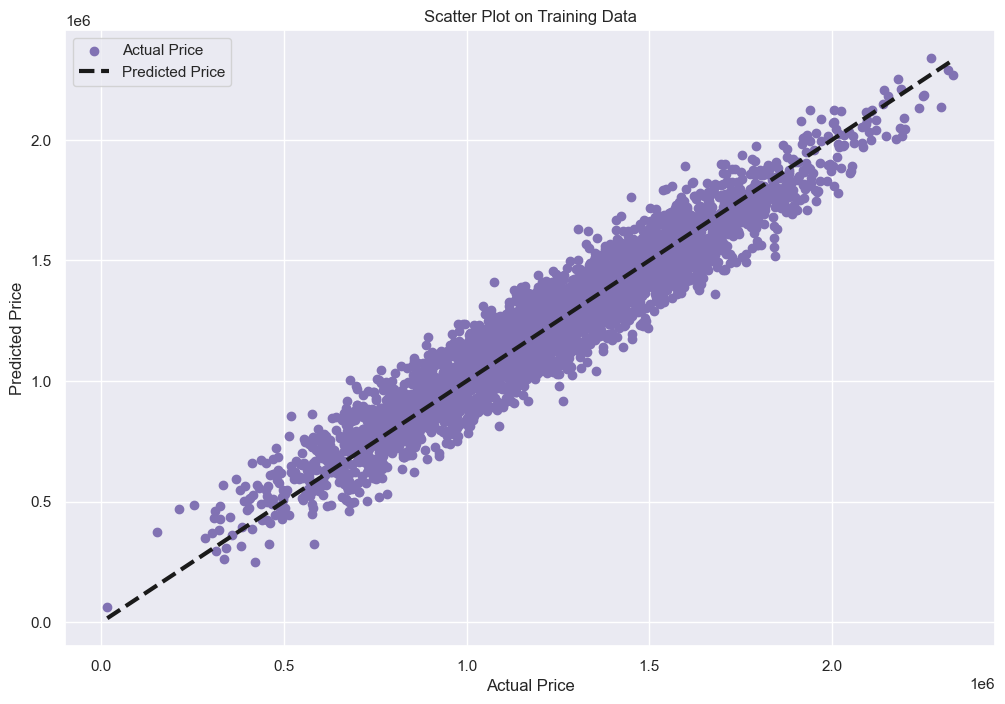

In [366]:
training_evaluation(y_train, y_pred_train)

In [367]:
#FOR TEST DATA

In [368]:
def test_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))    
    mae = mean_absolute_error(actual, predicted)
    r2 =  r2_score(actual, predicted)
    
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')    
    print(f'MAE: {mae}')
    print(f'R2 Score: {r2}')    
    print('\n')
    
    
    plt.scatter(actual, predicted, color='m', label='Actual Price')
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 
             color='k', linestyle='dashed', lw = 3, label='Predicted Price')
    plt.title('Scatter Plot on Training Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.grid()

MSE: 9542801978.105497
RMSE: 97687.2662024355
MAE: 79080.67352476912
R2 Score: 0.9132191795707956




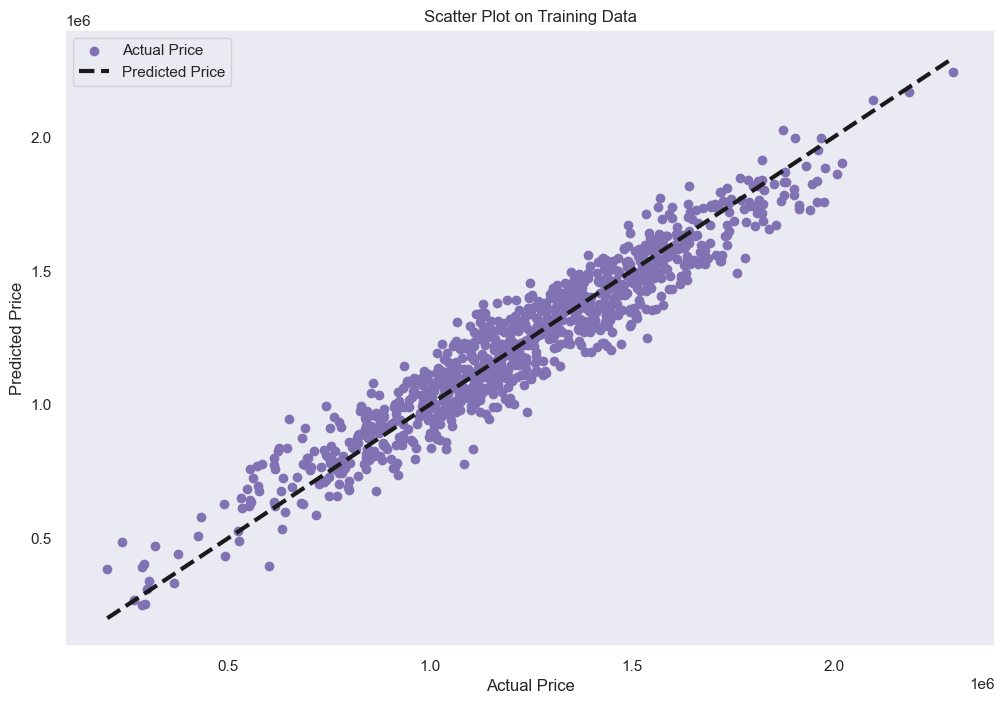

In [369]:
test_evaluation(y_test, y_pred_test)